 1. Parameter Tuning:
Varied parameters like population size, mutation rate, or tournament size. Analyzed their impact on the results.
**Purpose:** To learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

2. Fitness Score Analysis Over Generations:
Ploted the fitness score of the best individual over generations for different configurations.
**Purpose:** Visualize and understand the convergence behavior of the algorithm under different settings.

3. Solution Diversity Analysis:
Implemented a method to measure and report the diversity of solutions in the population over time.
**Purpose:** Explore the balance between exploration and exploitation in genetic algorithms.

In [1]:
# Install necessary libraries
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
149	222   	284.806	11.8843 
150	219   	285.359	10.1643 
151	220   	285.638	11.8843 
152	206   	284.882	8.40515 
153	206   	283.45 	4.33574 
154	201   	284.647	11.8843 
155	201   	283.247	11.8843 
156	211   	285.392	9.21997 
157	210   	286.254	11.8843 
158	217   	285.06 	10.3659 
159	194   	284.968	2.25892 
160	213   	285.07 	8.40515 
161	214   	285.919	8.35802 
162	218   	285.557	2.35395 
163	220   	286.71 	11.8843 
164	217   	284.167	2.49234 
165	224   	285.714	7.77167 
166	227   	284.525	8.40515 
167	193   	284.606	2.35395 
168	233   	285.55 	10.5344 
169	208   	284.442	11.8843 
170	206   	284.432	3.90013 
171	213   	285.715	8.40515 
172	219   	286.236	11.8843 
173	206   	285.305	1.94705 
174	207   	283.123	8.35802 
175	220   	284.748	10.6414 
176	225   	285.045	9.73453 
177	215   	286.821	8.37111 
178	204   	285.902	11.8843 
179	199   	287.351	11.8843 
180	195   	290.588	11.8843 
181	191   	292.912	6.41052 
182	196   	290.79 	2.8688

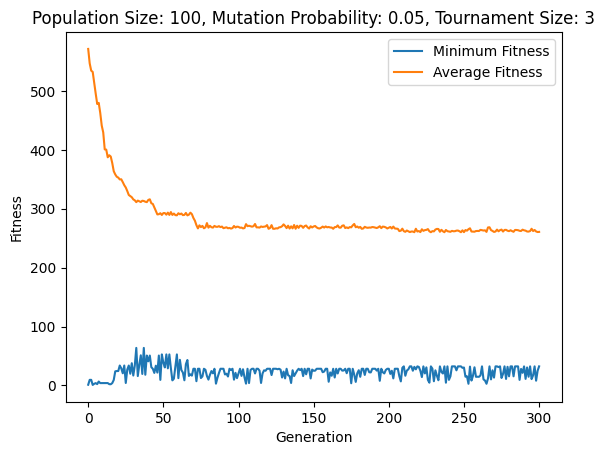

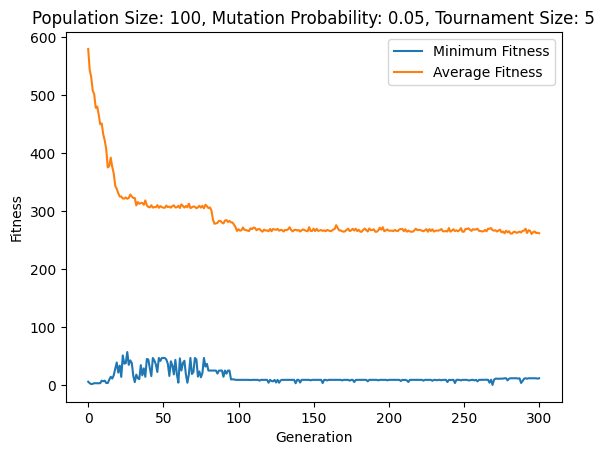

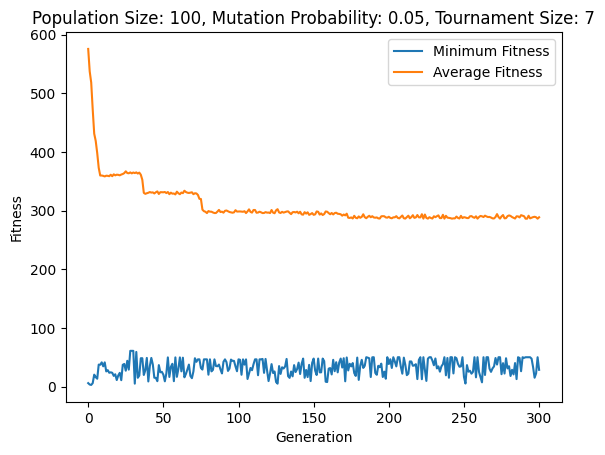

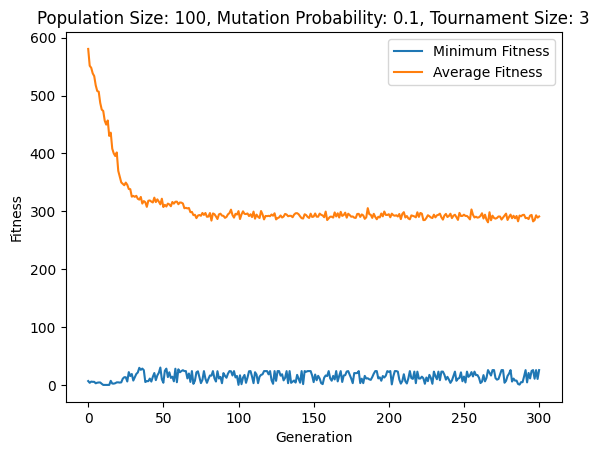

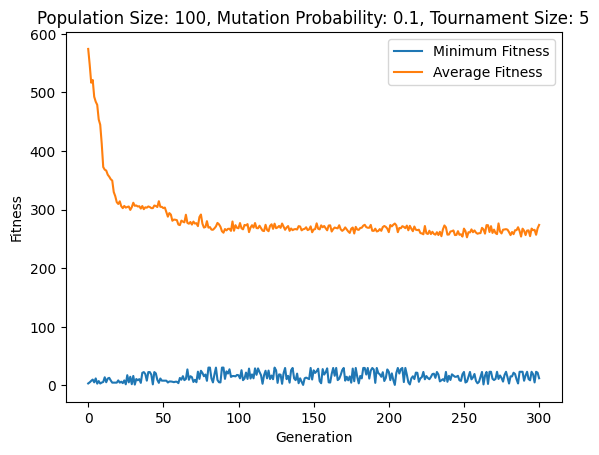

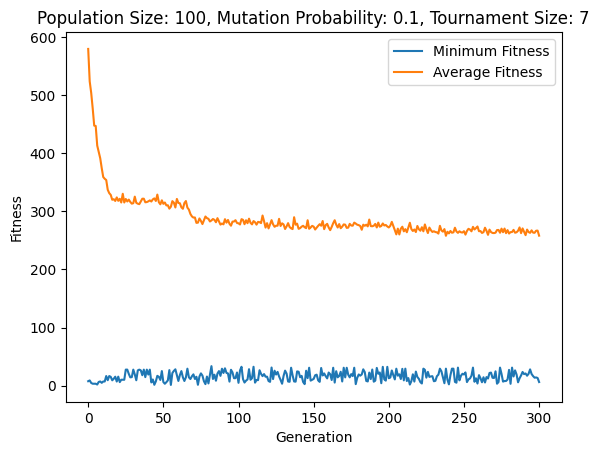

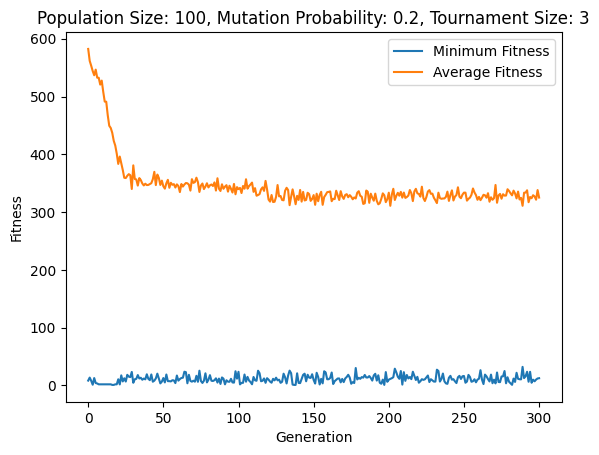

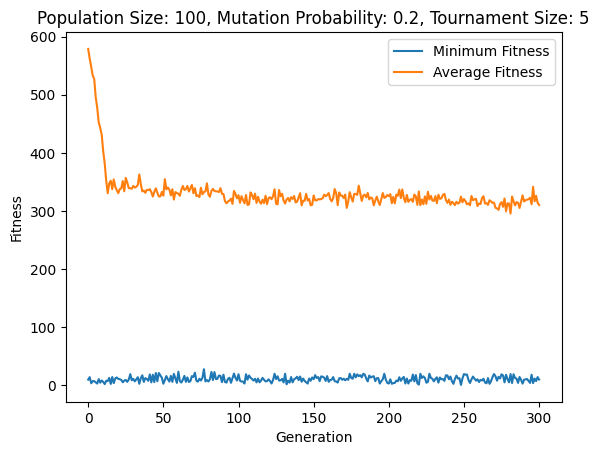

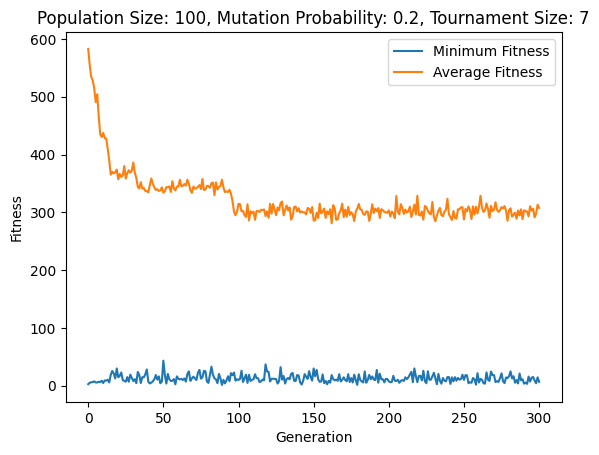

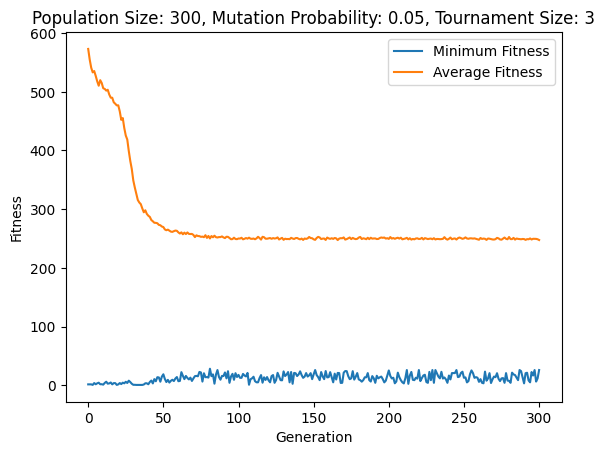

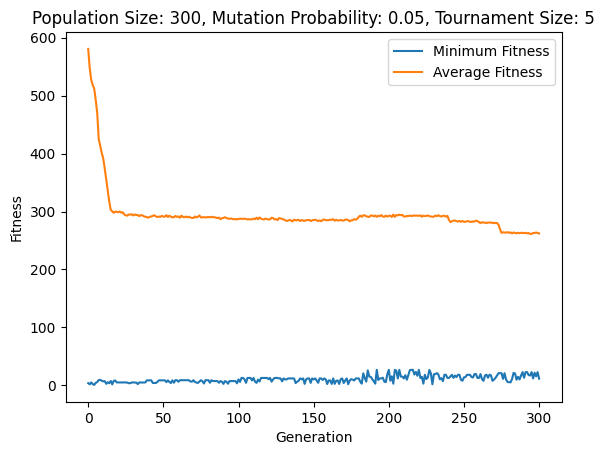

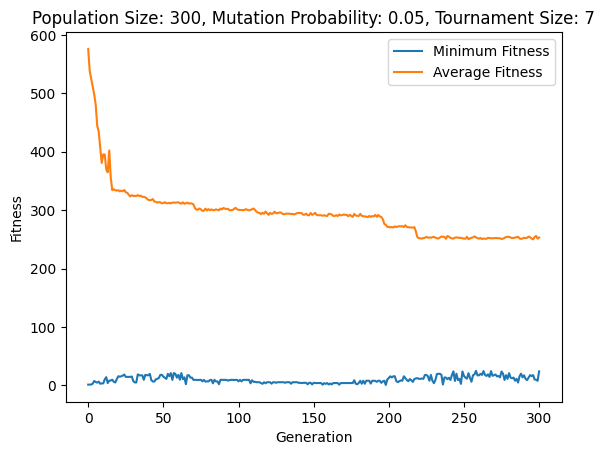

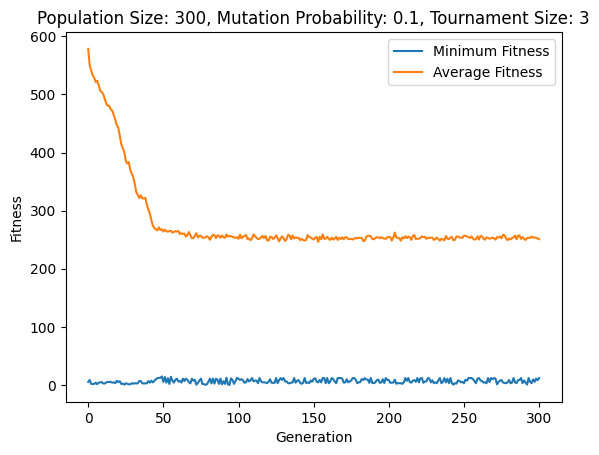

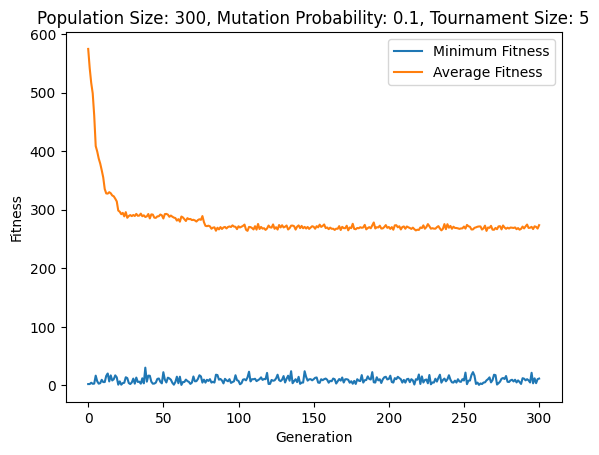

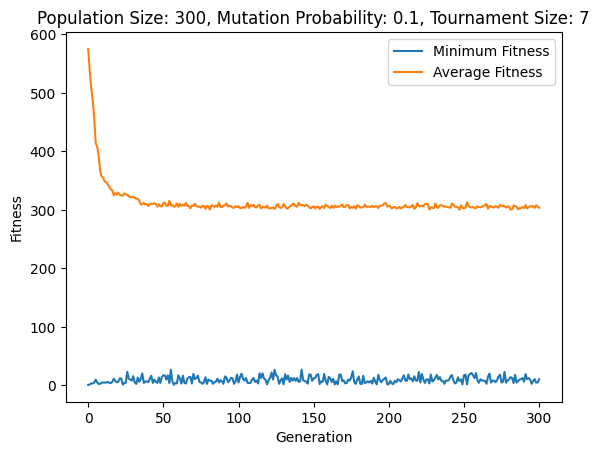

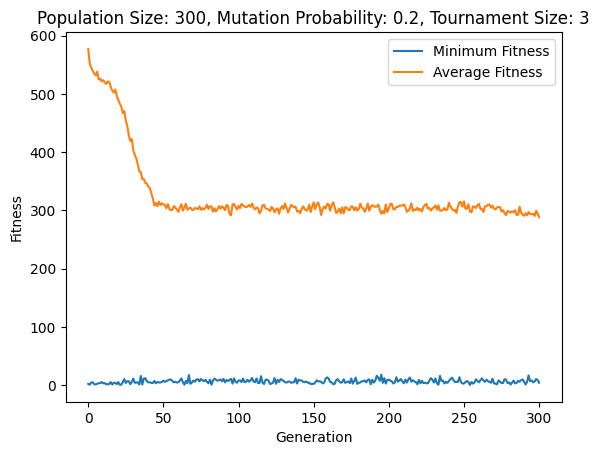

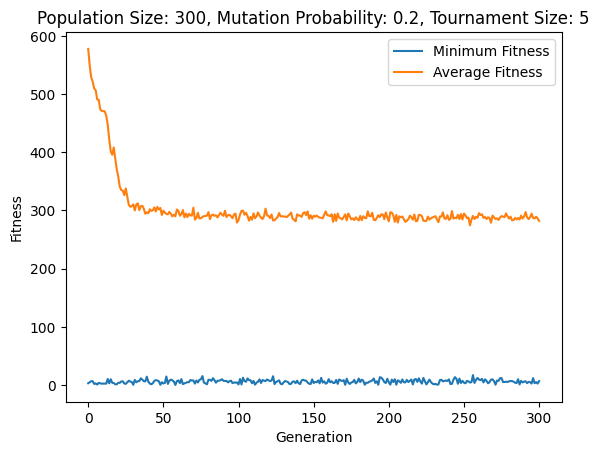

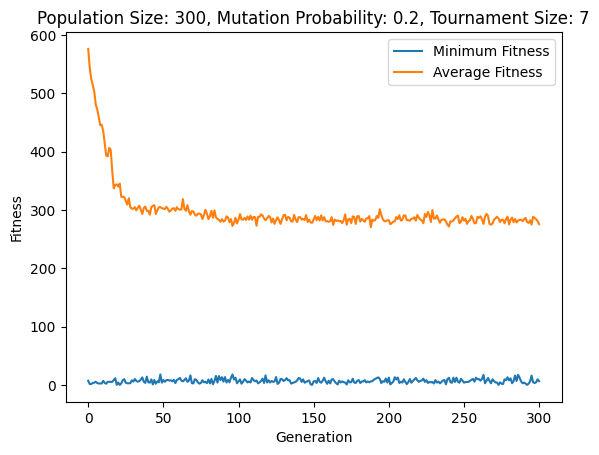

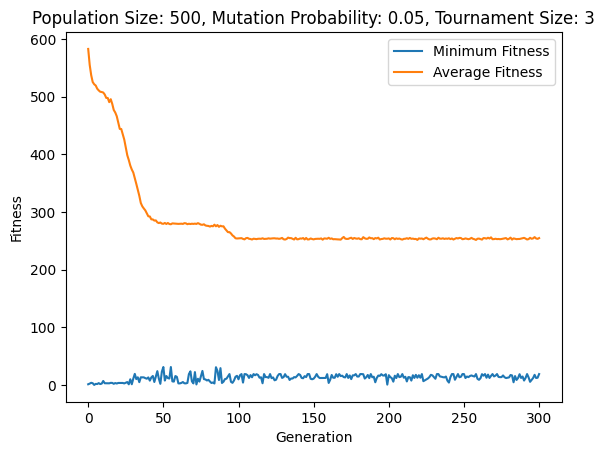

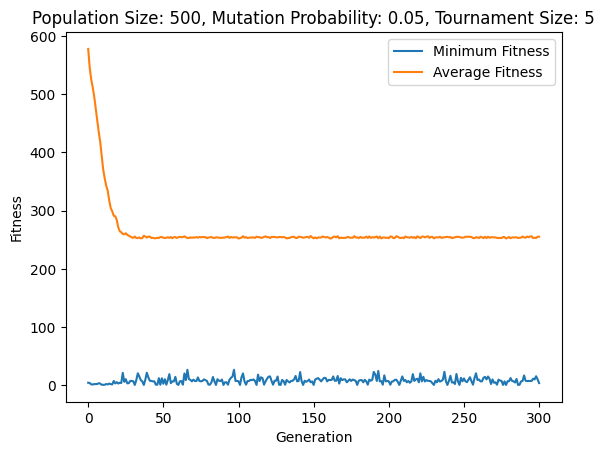

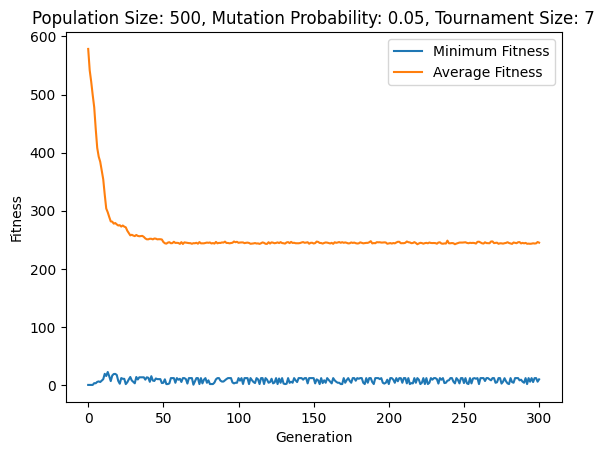

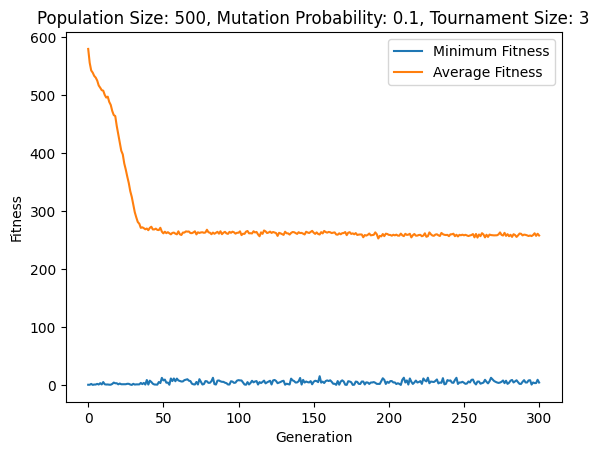

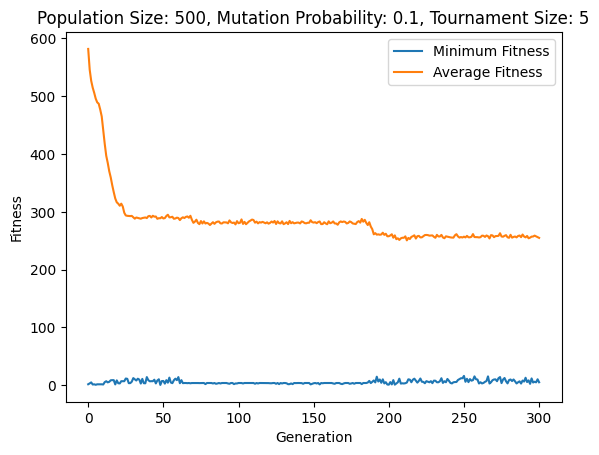

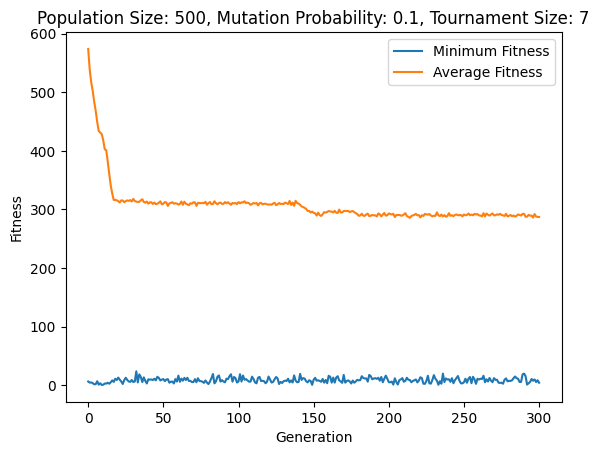

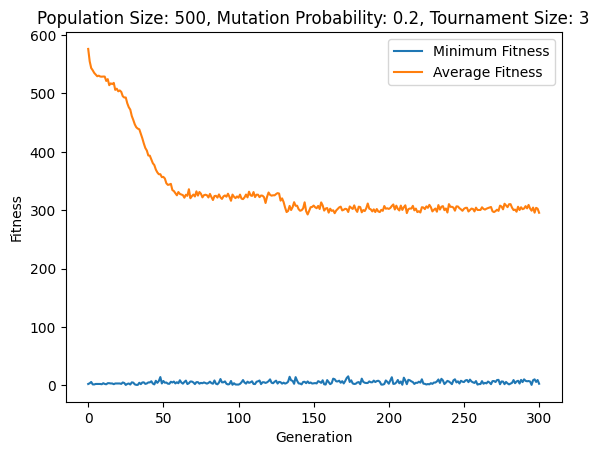

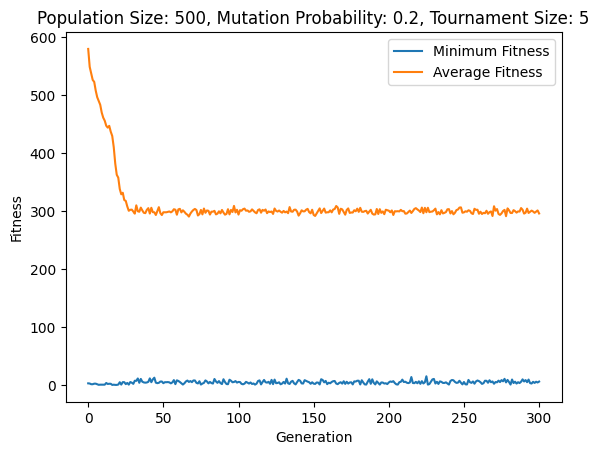

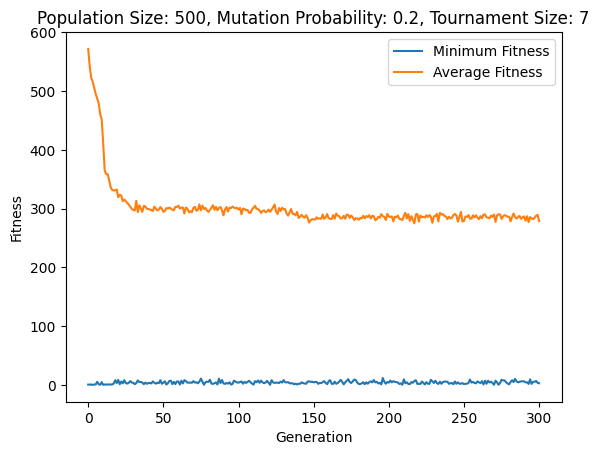

gen	nevals	avg    	min   
0  	300   	571.098	1.1223
1  	218   	542.599	0.398371
2  	225   	526.881	3.62732 
3  	228   	516.898	1.4049  
4  	239   	505.304	2.65256 
5  	244   	490.828	2.53461 
6  	224   	482.955	1.39756 
7  	221   	448.014	5.4977  
8  	249   	430.701	2.86807 
9  	232   	389.487	4.38026 
10 	214   	376.985	1.55765 
11 	222   	371.066	8.9085  
12 	231   	360.123	3.48223 
13 	218   	356.184	3.48112 
14 	218   	356.726	2.13774 
15 	233   	354.127	7.48913 
16 	225   	357.159	13.5524 
17 	232   	362.834	7.36687 
18 	235   	358.466	3.23254 
19 	232   	354.978	9.19353 
20 	223   	350.091	12.2424 
21 	226   	349.219	7.95455 
22 	229   	342.711	11.7729 
23 	226   	346.944	7.88851 
24 	233   	339.919	11.6571 
25 	221   	346.947	18.1601 
26 	223   	340.574	5.58618 
27 	224   	342.053	9.2787  
28 	232   	342.949	6.49063 
29 	228   	339.156	6.90724 
30 	246   	336.711	2.21536 
31 	218   	334.45 	2.92105 
32 	232   	340.774	5.59018 
33 	213   	339.034	12.4012 
34 	228   	342.212	15.14

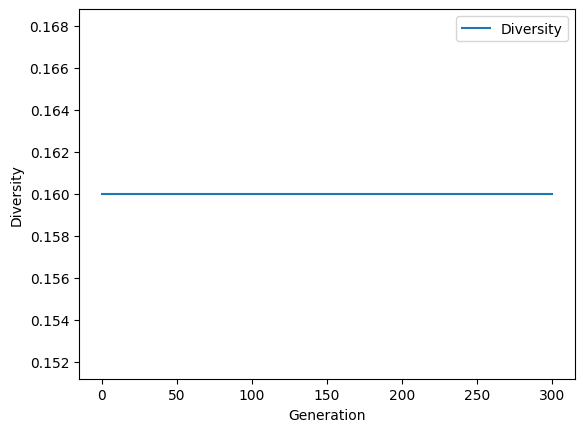

In [2]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Define the number of locations and vehicles
num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def tune_parameters():
    random.seed(42)
    pop_sizes = [100, 300, 500]
    mutation_probs = [0.05, 0.1, 0.2]
    tournament_sizes = [3, 5, 7]

    best_configurations = []

    for pop_size in pop_sizes:
        for mut_prob in mutation_probs:
            for tourn_size in tournament_sizes:
                print(f"Running for Pop Size: {pop_size}, Mut Prob: {mut_prob}, Tourn Size: {tourn_size}")
                toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mut_prob)
                toolbox.register("select", tools.selTournament, tournsize=tourn_size)

                pop = toolbox.population(n=pop_size)
                hof = tools.HallOfFame(1)

                stats = tools.Statistics(lambda ind: ind.fitness.values)
                stats.register("avg", np.mean)
                stats.register("min", np.min)

                final_pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, mut_prob, 300, stats=stats, halloffame=hof)

                best_configurations.append((pop_size, mut_prob, tourn_size, hof[0].fitness.values, logbook))

    return best_configurations

def analyze_fitness_over_generations():
    best_configs = tune_parameters()

    for config in best_configs:
        pop_size, mut_prob, tourn_size, best_fitness, logbook = config

        gen = logbook.select("gen")
        min_fit = logbook.select("min")
        avg_fit = logbook.select("avg")

        plt.figure()
        plt.plot(gen, min_fit, label="Minimum Fitness")
        plt.plot(gen, avg_fit, label="Average Fitness")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.title(f"Population Size: {pop_size}, Mutation Probability: {mut_prob}, Tournament Size: {tourn_size}")
        plt.legend(loc="best")
        plt.show()

def measure_solution_diversity():
    def diversity(population):
        unique_individuals = set(tuple(ind) for ind in population)
        return len(unique_individuals) / len(population)

    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    final_pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Measure diversity over generations
    diversities = []
    for gen in logbook:
        diversities.append(diversity(pop))

    # Plotting the diversity over generations
    plt.plot(range(len(diversities)), diversities, label="Diversity")
    plt.xlabel("Generation")
    plt.ylabel("Diversity")
    plt.legend()
    plt.show()

# Run fitness analysis
analyze_fitness_over_generations()

# Run diversity analysis
measure_solution_diversity()